In [167]:
import scipy.signal as sg
import scipy.interpolate as si
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotnine import *
import plotnine

%matplotlib inline
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [168]:
data = pd.read_csv("../Data/Austin_endtidal/BOLD_CO2_O2_edit.txt", names=['Time','Oxy', 'Carbon', "worthless", 'garbo'], usecols = [0,1,2],index_col=False, sep='\t')
data.head()


,Time,Oxy,Carbon
0,0.000000,21.8658,26.9012
1,0.000533,21.8608,26.9368
2,0.001067,21.8709,27.1606
3,0.001600,21.8404,27.3234
4,0.002133,21.8201,27.4556


In [169]:
print(data.Time.head())

0    0.000000
1    0.000533
2    0.001067
3    0.001600
4    0.002133
Name: Time, dtype: float64


In [170]:
def showMe(this, called_that):
    plt.figure(figsize=(20,10)), plt.title(called_that)
    plt.plot(this)
    plt.show()

#showMe(data.Carbon, "title")

peaks, _ = sg.find_peaks(data.Carbon, prominence = 2)
peakCO2 = data.iloc[peaks] #slice by list of integers

#
    


62


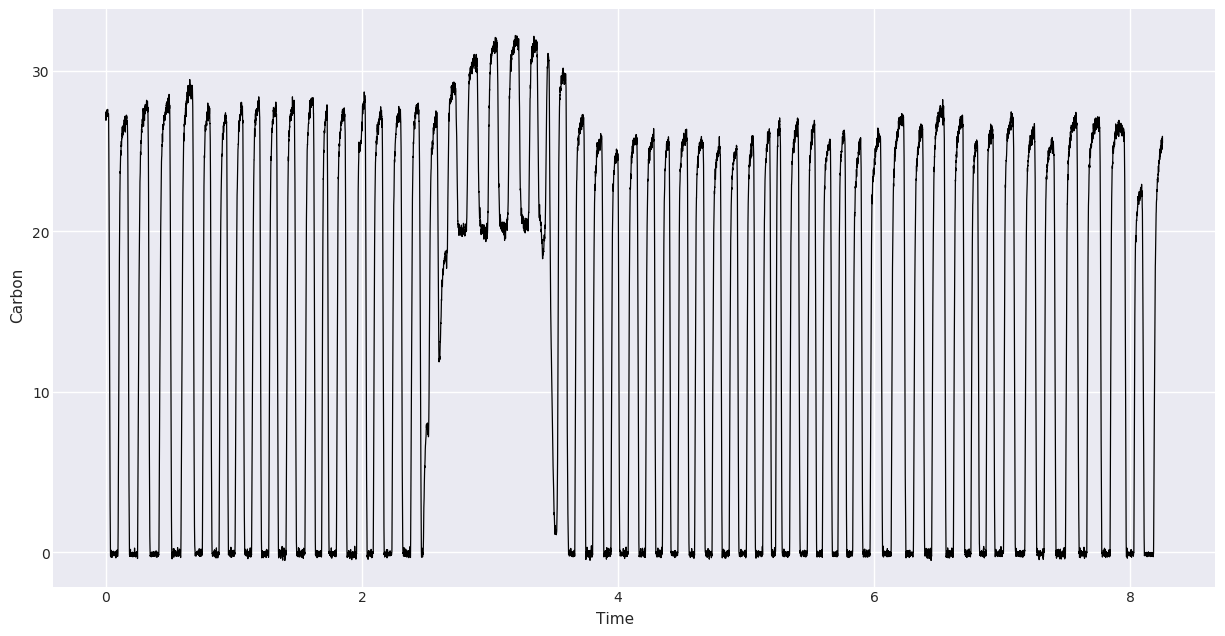

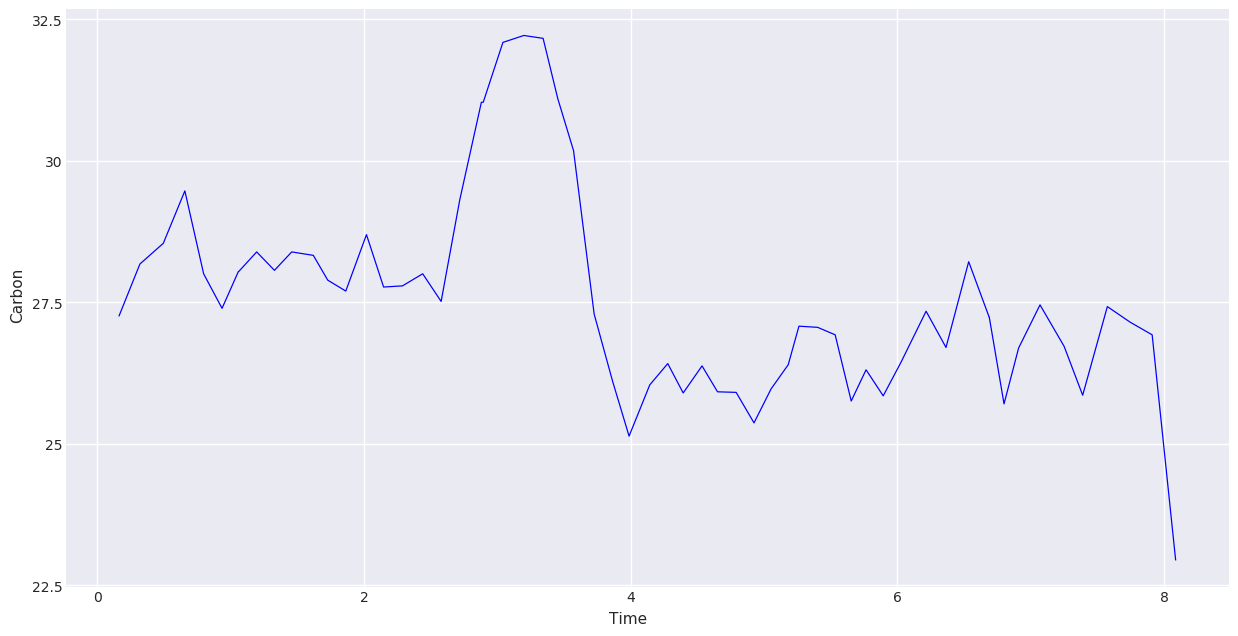

In [171]:
plotnine.options.figure_size=(15,7.5)
(ggplot(data) #can pass all data
 + aes('Time', 'Carbon') #data selection (x,y) >> can layer
 + geom_line(size=.5)
 + theme_seaborn()
).draw()

(ggplot(peakCO2)
 +aes('Time', 'Carbon')
 +geom_line(size=.5, color='blue')
 #+geom_histogram() #cannot be used with a Y -aesthetic
 +theme_seaborn()
 #+facet_wrap() #can split graphs based on a chosen variable
).draw()

print (len(peaks)) # this is to stop jupyter from drawing multiple of the same graph
#.save(filename, format, path, blah blah blah)

72
15473


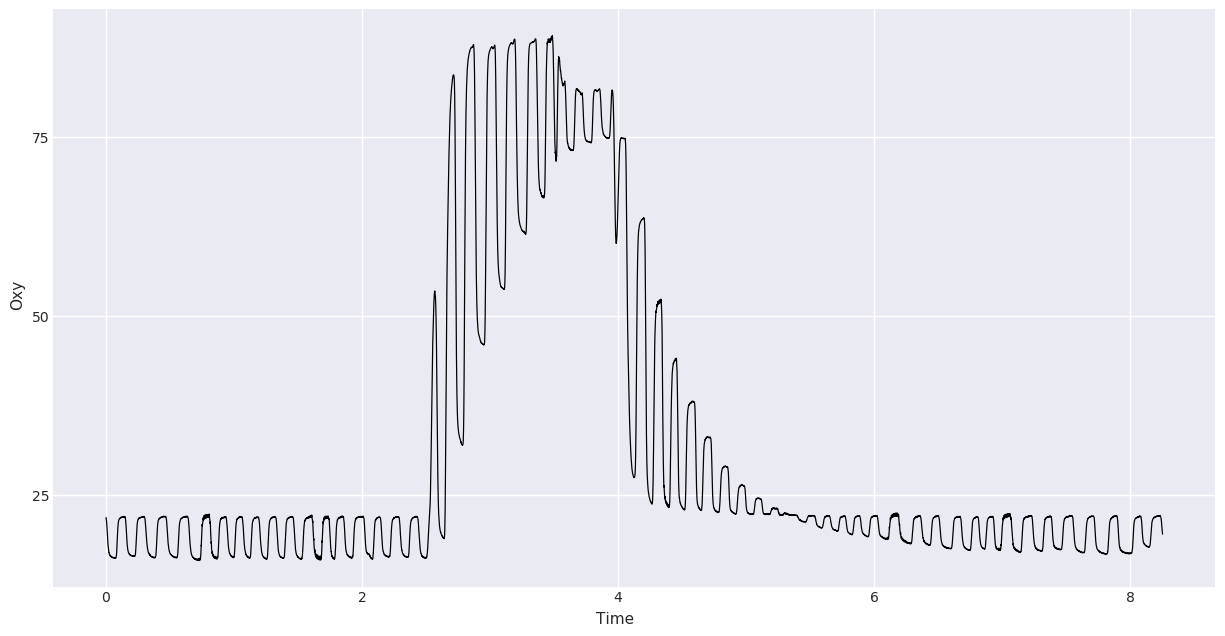

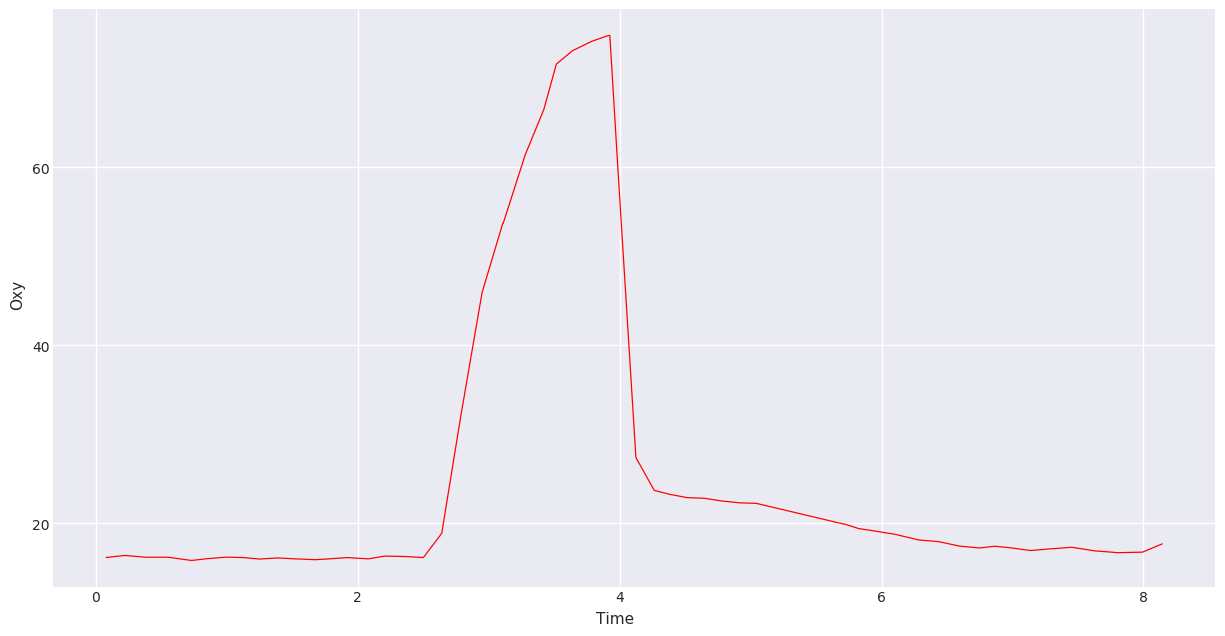

In [176]:
data['invOx'] = -data.Oxy + 400
oPeaks, _ = sg.find_peaks(data.invOx, prominence=2)

(ggplot(data)
 +aes('Time', 'Oxy')
 +geom_line(size=.5)
 +theme_seaborn()
).draw()

peakO2 = data.iloc[oPeaks]
(ggplot(data.iloc[oPeaks])
 + aes('Time', 'Oxy')
 +geom_line(size=.5,color='red')
 +theme_seaborn()
).draw()


print (len(oPeaks))
print (len(data.Time))

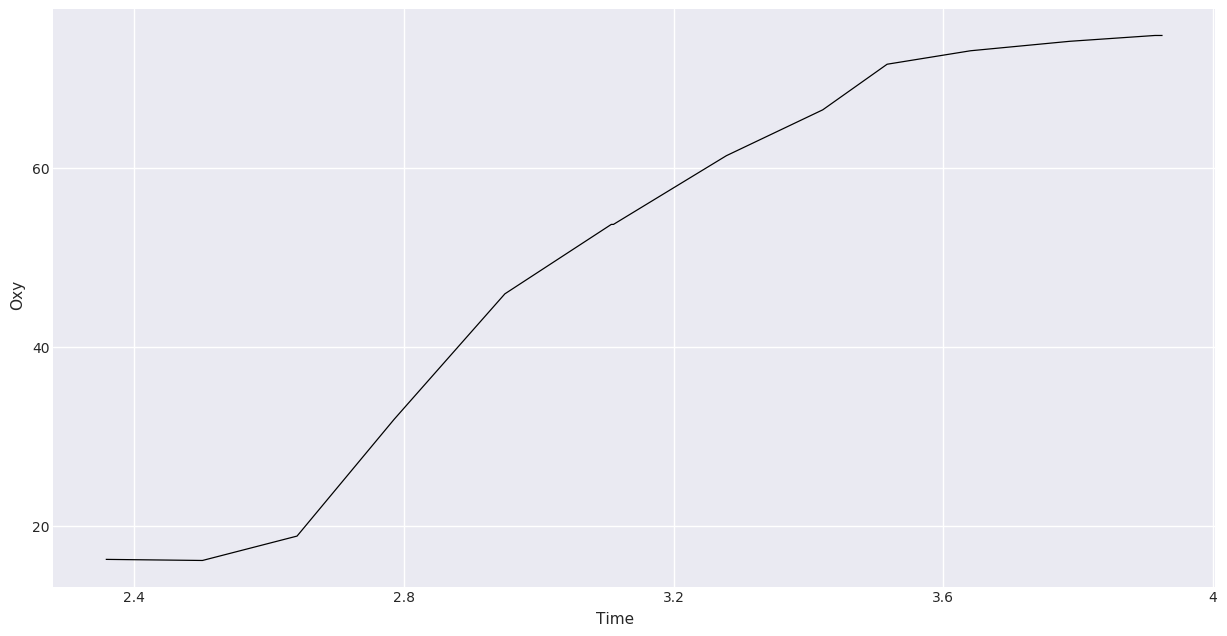

In [205]:
(ggplot(peakO2.iloc[25:40])
 +aes("Time", "Oxy")
 +geom_line()
 +theme_seaborn()
).draw()

logistic = peakO2.iloc[25:40]

/Users/borainbow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/borainbow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


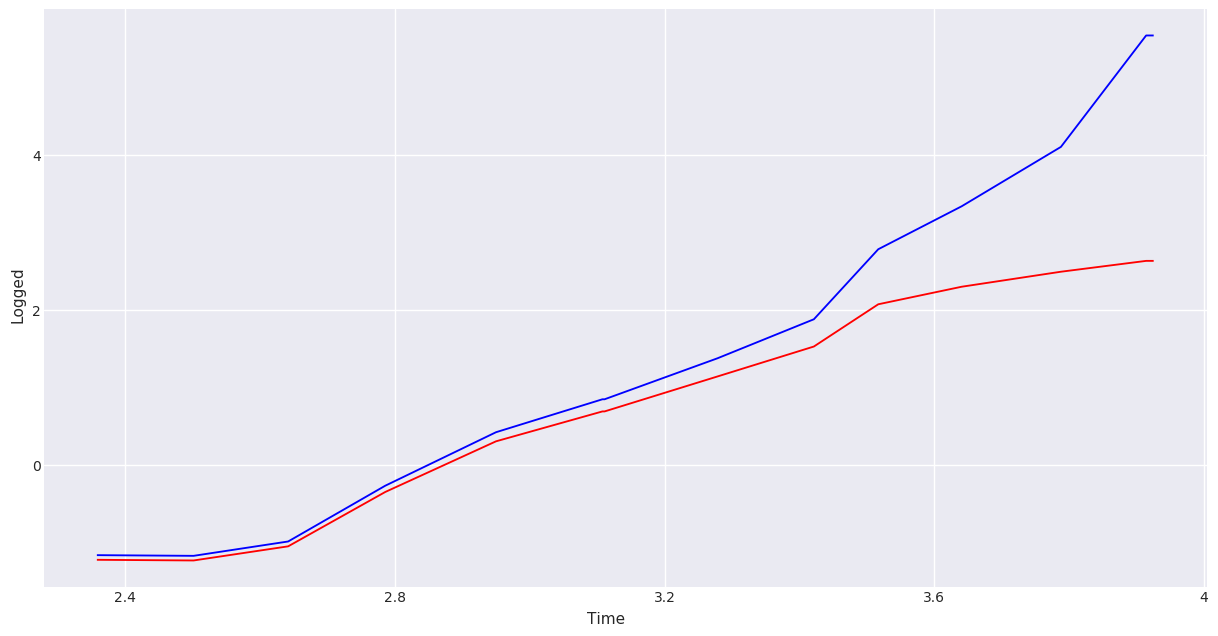

<ggplot: (-9223372029307845358)>

In [207]:
# log_b(y/(L-y)) = aX
logistic['Logged'] = np.log(logistic.Oxy/(79 - logistic.Oxy))
logistic['Logged1'] = np.log(logistic.Oxy/(75 - logistic.Oxy))

(ggplot(logistic)
 +geom_line( aes("Time", "Logged"), size=.75, color='red')
 +geom_line( aes("Time", 'Logged1'), size=.75, color='blue')
 +theme_seaborn()
)